In [1]:
import numpy as np
from blimpy import Waterfall
import pandas as pd 

target = 'HIP34115'
f_start, f_stop = 1531.494140625, 1587.890625
# f_start, f_stop =1023.9257812499999, 1080.322265625
resolution = 2.835503418452676e-06

df =pd.read_csv('../GBT_pipeline/result/'+target +'_directory.csv')
name = df['0'].tolist()

loaded_data = np.zeros((6,16,1,20185088))

for i in range(6):
    loaded_data[i,:,:,:] =  Waterfall(name[i],f_start=f_start, f_stop=f_stop).data

print(loaded_data.shape)
num_samples = int((f_stop-f_start)//resolution//256)


(6, 16, 1, 20185088)


In [27]:
# [1023.9257812499999, 1080.322265625], [1080.322265625, 1136.71875], [1136.71875, 1193.115234375], [1193.115234375, 1249.51171875], [1249.51171875, 1305.908203125], [130
# 5.908203125, 1362.3046875], [1362.3046875, 1418.701171875], [1418.701171875, 1475.09765625], [1475.09765625, 1531.494140625], [1531.494140625, 1587.890625], [1587.890625
# , 1644.287109375], [1644.287109375, 1700.68359375], [1700.68359375, 1757.080078125], [1757.080078125, 1813.4765625], [1813.4765625, 1869.873046875], [1869.873046875, 192
# 6.26953125]

In [2]:
final_set = np.zeros((num_samples,6, 16,256))
for i in range(num_samples):
    final_set[i,:,:,:] = loaded_data[:,:,0,i*(256):(i+1)*256]
    

In [3]:
print(final_set[:].shape)

(77692, 6, 16, 256)


In [4]:
np.save('../../real_filtered_test.npy', final_set[:])

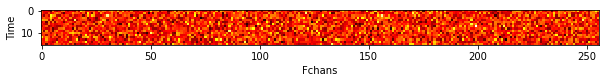

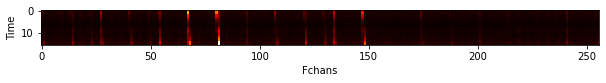

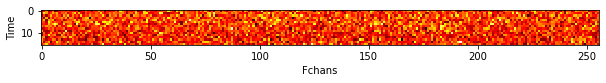

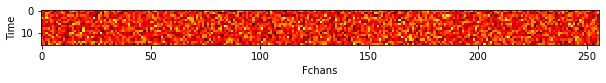

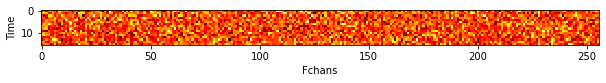

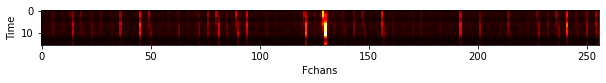

In [16]:
import matplotlib.pyplot as plt 
from random import random

%matplotlib inline
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(final_set[int(random()*77692),i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()